DISCLAIMER: I DID NOT ORIGINALLY WRITE THIS CODE

# Mean Reversion Trading Algorithm
* Trading strategy that focuses on when a security moves "too" far away from some kind of average
* General idea is that it will move back toward the mean - at some point
* Many ways to look at this strategy, i.e. linear regression, moving average
* How far is too far?

In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

In [2]:
gld = pd.DataFrame(pdr.get_data_yahoo('GLD')['Close'])
gld.head()

,Close
Date,
2017-02-21,117.750000
2017-02-22,117.910004
2017-02-23,118.940002
2017-02-24,119.699997
2017-02-27,119.120003


In [3]:
ma = 21
gld['returns'] = np.log(gld["Close"]).diff()
gld['ma'] = gld['Close'].rolling(ma).mean()
gld['ratio'] = gld['Close'] / gld['ma']

gld['ratio'].describe()

count    1238.000000
mean        1.003205
std         0.020008
min         0.915509
25%         0.990597
50%         1.002002
75%         1.015855
max         1.087576
Name: ratio, dtype: float64

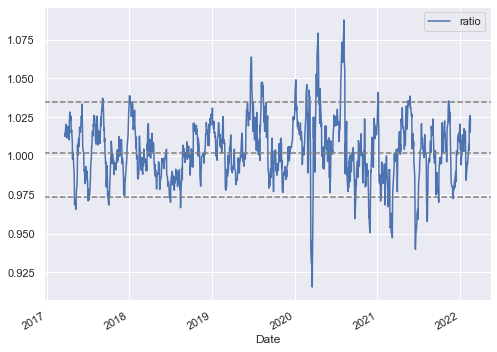

In [4]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(gld['ratio'].dropna(), percentiles)

gld['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');

<AxesSubplot:xlabel='Date'>

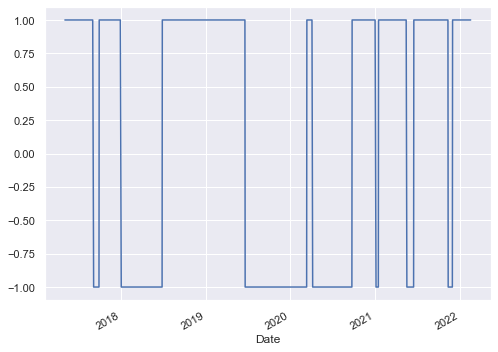

In [5]:
short = p[-1]
long = p[0]
gld['position'] = np.where(gld.ratio > short, -1, np.nan)
gld['position'] = np.where(gld.ratio < long, 1, gld['position'])
gld['position'] = gld['position'].ffill()

gld.position.dropna().plot()

In [6]:
gld['strat_return'] = gld['returns'] * gld['position'].shift()

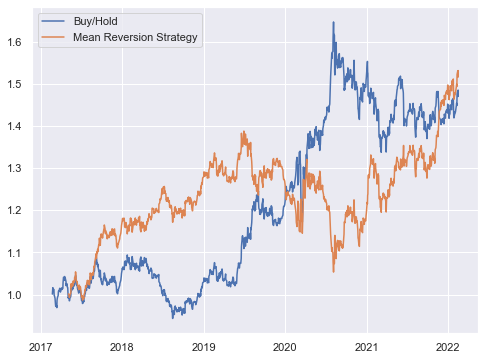

In [8]:
plt.plot(np.exp(gld['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['strat_return'].dropna()).cumprod(), label='Mean Reversion Strategy')
plt.legend();

In [9]:
print(np.exp(gld['returns'].dropna()).cumprod()[-1] -1)
print(np.exp(gld['strat_return'].dropna()).cumprod()[-1] - 1)

0.4850106208947069
0.531341434810547
